In [42]:
import h5py
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(style='white', font_scale=2.0, palette='Set1')

In [2]:
h5 = h5py.File('dump_1.0_0.001_12345.h5')

In [17]:
sp = np.array(h5['/particles/atoms/species/value'])

In [20]:
zip(*np.unique(sp[-1], return_counts=True))

[(-1, 24), (1, 250), (4, 386), (5, 364)]

In [22]:
sp_count = {x: [] for x in range(0, 6)}
for s in sp:
    tmp = dict(zip(*np.unique(s, return_counts=True)))
    for k in sp_count:
        sp_count[k].append(tmp.get(k, 0))

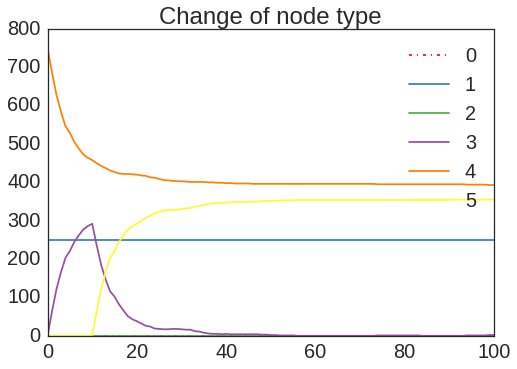

In [87]:
for k in sp_count:
    plt.plot(sp_count[k], '-.' if k == 0 else '-', label=k)
plt.legend()
plt.xlim([0, 100])
plt.title('Change of node type')
plt.savefig('change_of_node_type.png', dpi=200)

In [34]:
st = np.array(h5['/particles/atoms/state/value'])

In [38]:
st_count = {x: [] for x in range(0, 4)}
for s in st:
    tmp = dict(zip(*np.unique(s, return_counts=True)))
    for k in st_count:
        st_count[k].append(tmp.get(k, 0))

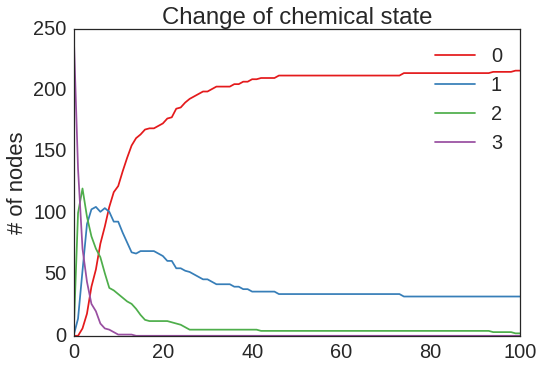

In [88]:
for k in st_count:
    plt.plot(st_count[k], label=k)
plt.legend()
plt.ylabel('# of nodes')
plt.xlim([0, 100])
plt.title('Change of chemical state')
plt.savefig('change_of_chemical_state.png', dpi=200)

In [40]:
b = h5['/connectivity/fpl/value'][-1]

In [43]:
g = nx.Graph()
for b1, b2 in b:
    if b1 != -1 and b2 != -1:
        g.add_edge(b1, b2)

In [96]:
cc_t = []
cc_min = []
cc_max = []
b_bonds = []
avg_degree = []
for bv in h5['/connectivity/fpl/value']:
    g = nx.Graph()
    g.add_nodes_from(range(0, 750, 4))
    for b1, b2 in bv:
        if b1 != -1 and b2 != -1:
            g.add_edge(b1, b2)
    cc_t.append(len(list(nx.connected_components(g))))
    b_bonds.append(len(g.edges()))
    cc_min.append(min([len(x) for x in list(nx.connected_components(g))]))
    cc_max.append(max([len(x) for x in list(nx.connected_components(g))]))
    avg_degree.append(np.average(nx.degree(g).values()))

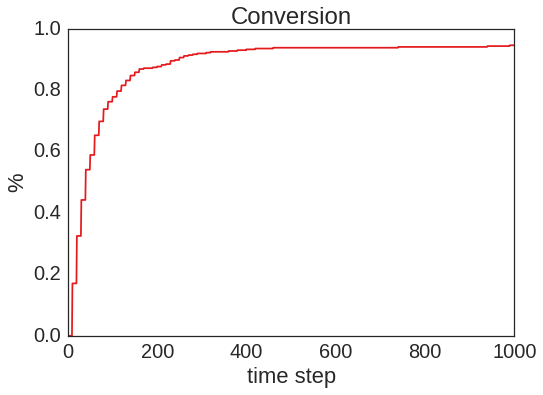

In [101]:
plt.plot(np.array(b_bonds)/375.0)
plt.title('Conversion')
plt.xlabel('time step')
plt.ylabel('%')
plt.xlim([0, 1000])
plt.savefig('number_of_bonds.png', dpi=200)

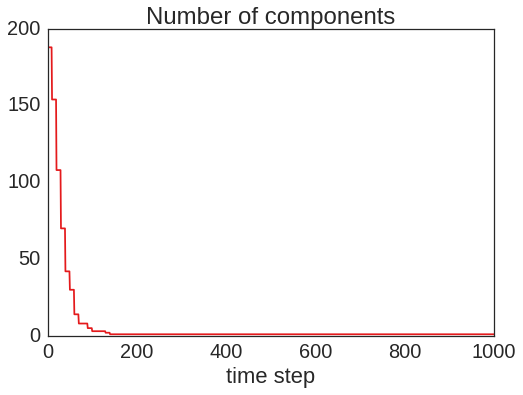

In [89]:
plt.plot(cc_t)
plt.title('Number of components')
plt.xlabel('time step')
plt.xlim([0,1000])
plt.savefig('number_of_components.png', dpi=200)

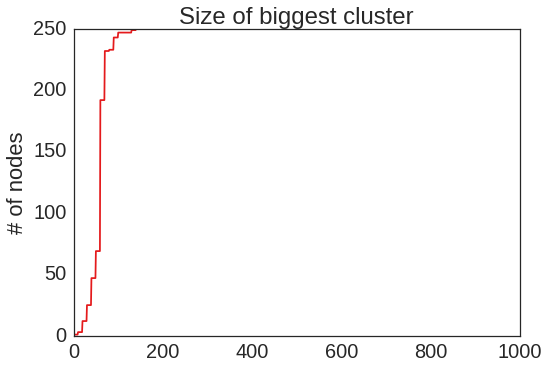

In [90]:
#plt.plot(cc_min, label='size of min')
plt.plot(cc_max, label='size of max')
plt.title('Size of biggest cluster')
plt.ylabel('# of nodes')
plt.xlim([0, 1000])
plt.savefig('size_of_biggest_cluster.png', dpi=200)

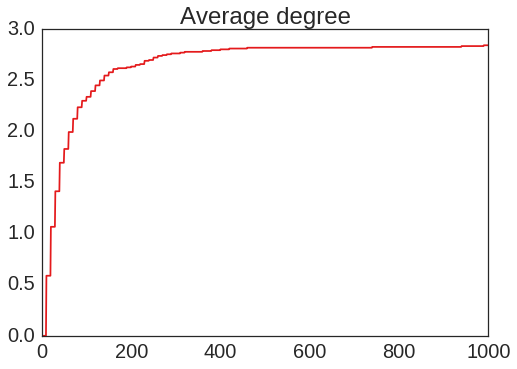

In [95]:
plt.plot(avg_degree)
plt.xlim([0,1000])
plt.title('Average degree')
plt.savefig('average_degree.png', dpi=200)

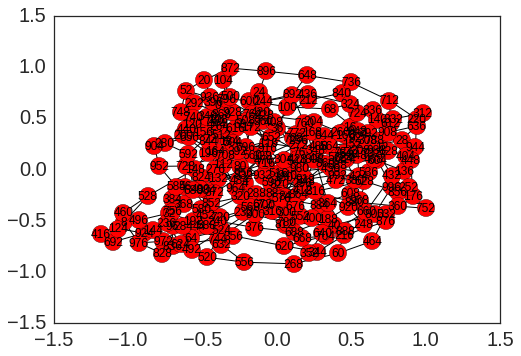

In [92]:
nx.draw_networkx(g)
plt.savefig('draw_networkx.png', dpi=200)